In [21]:
# Importing the packages we will use in the project

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\EngKa\OneDrive\Documents\Portfolio Projects\movies.csv')


In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# checking for any missing data


for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [5]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [6]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
df['votes'] = df['votes'].fillna(0).astype('int64')
df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')
df['runtime'] = df['runtime'].fillna(0).astype('int64')

In [8]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,0,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120


In [9]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [24]:
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').fillna(0).astype(int)

In [15]:
# Order our Data a little bit to see

df.sort_values(by=['gross'], inplace=False, ascending=False)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92,1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85,1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89,1989
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104,1990


Text(0, 0.5, 'Gross')

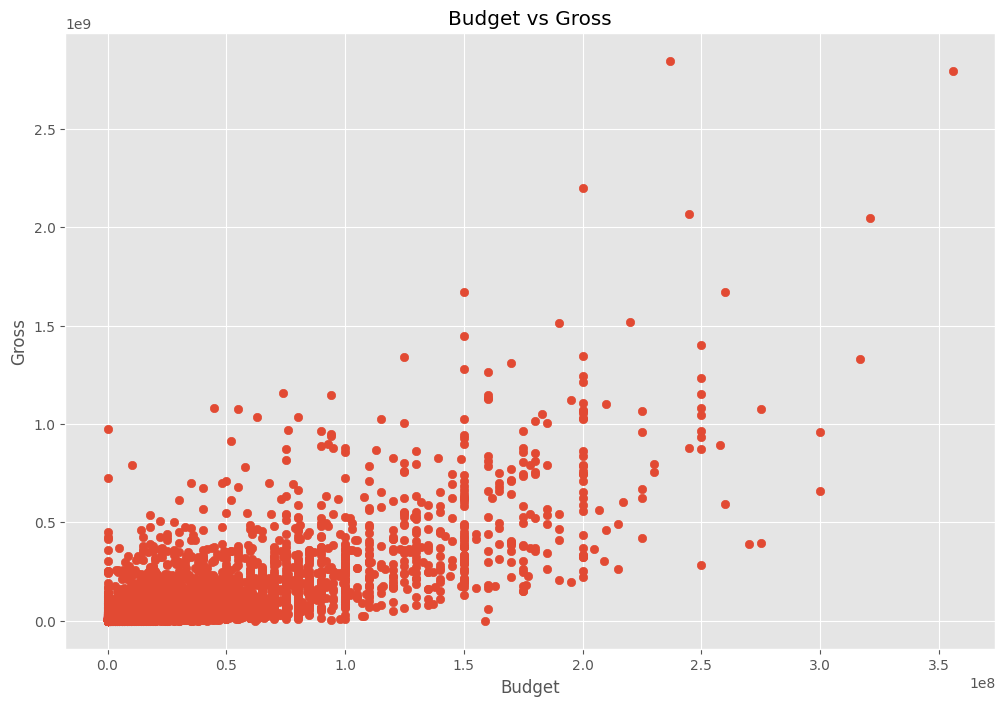

In [16]:
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')


<Axes: xlabel='budget', ylabel='gross'>

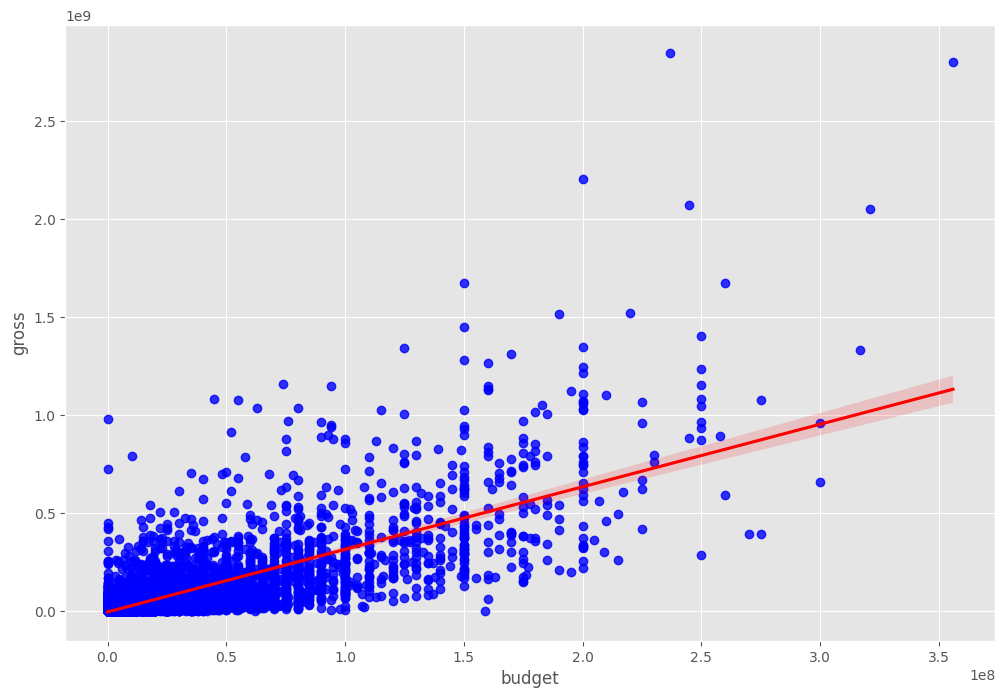

In [17]:
sns.regplot (x='budget' , y='gross' , data=df , scatter_kws={'color':'blue'} , line_kws={'color':'red'})

In [29]:
# Checking the correlation

df.corr(method = 'pearson')

ValueError: could not convert string to float: 'The Shining'

In [ ]:
# It gave error so we changed the objects into codes to find correlation between all the data

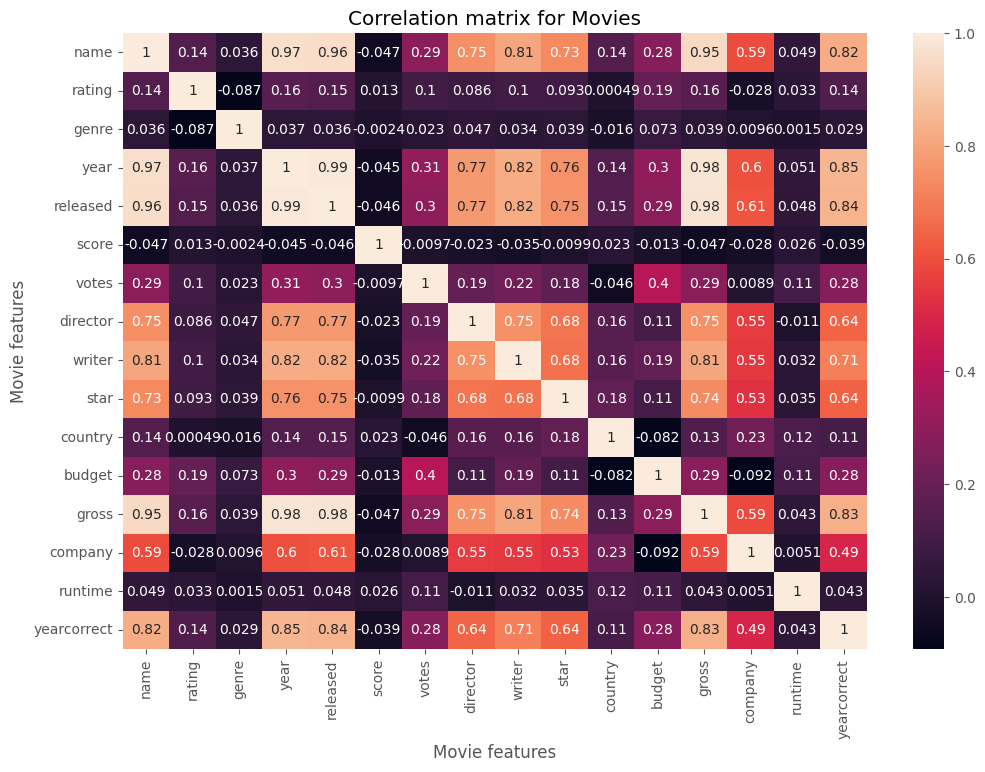

In [26]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [27]:
correlation_matrix

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,0.143938,0.036367,0.965761,0.959015,-0.046733,0.287776,0.745905,0.805211,0.731565,0.142828,0.277488,0.947324,0.591667,0.048955,0.820885
rating,0.143938,1.000000,-0.086723,0.156713,0.146606,0.012595,0.099972,0.085520,0.103623,0.093116,0.000494,0.193353,0.158582,-0.028035,0.032741,0.135866
genre,0.036367,-0.086723,1.000000,0.037184,0.035940,-0.002437,0.023285,0.047288,0.033688,0.038649,-0.015795,0.073008,0.038616,0.009566,0.001462,0.028752
year,0.965761,0.156713,0.037184,1.000000,0.993190,-0.044981,0.312401,0.770497,0.824770,0.756400,0.140216,0.300621,0.980873,0.601571,0.050647,0.849643
released,0.959015,0.146606,0.035940,0.993190,1.000000,-0.045761,0.299905,0.770876,0.819617,0.754468,0.148468,0.285691,0.976423,0.607954,0.048235,0.839850
score,-0.046733,0.012595,-0.002437,-0.044981,-0.045761,1.000000,-0.009749,-0.022687,-0.034685,-0.009896,0.023097,-0.012642,-0.047041,-0.028432,0.026436,-0.039013
votes,0.287776,0.099972,0.023285,0.312401,0.299905,-0.009749,1.000000,0.192220,0.224122,0.179601,-0.045914,0.398519,0.286180,0.008900,0.106024,0.276144
director,0.745905,0.085520,0.047288,0.770497,0.770876,-0.022687,0.192220,1.000000,0.748340,0.682385,0.155471,0.106617,0.750911,0.552258,-0.011070,0.642925
writer,0.805211,0.103623,0.033688,0.824770,0.819617,-0.034685,0.224122,0.748340,1.000000,0.675685,0.157202,0.187238,0.805576,0.546151,0.032264,0.706932
star,0.731565,0.093116,0.038649,0.756400,0.754468,-0.009896,0.179601,0.682385,0.675685,1.000000,0.182045,0.107991,0.735680,0.527116,0.035392,0.640517


In [ ]:
# director & writer & star have the highest correlation to the gross earning